In [1]:
#importing dependencies
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
dataset=pd.read_csv('Data file.csv')

In [3]:
dataset.shape

(209593, 37)

# Exploratory Analysis


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
pd.set_option('display.max_columns', None)
dataset.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
#dropping Unnamed columns and mobile number of the customers as they are unique for every row 
dataset.drop(columns=['Unnamed: 0','msisdn'],inplace=True)

In [7]:
dataset.shape

(209593, 35)

In [8]:
dataset.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Dataset doesn't contain any null values

In [9]:
dataset.nunique()

label                        2
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback30                 1363
payback9

In [10]:
dataset.maxamnt_loans90.value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [11]:
dataset.medianamnt_loans90.value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

In [12]:
#splitting the pdate columns into year month and day columns
dataset[["year", "month", "day"]] = dataset["pdate"].str.split("-", expand = True)
print("\nNew DataFrame:")
dataset.drop(columns=['pcircle','pdate'],inplace=True)
dataset.head()


New DataFrame:


,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,year,month,day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016,07,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016,08,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016,08,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016,06,06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016,06,22


In [13]:
#converting to numeric data
dataset["year"]=pd.to_numeric(dataset["year"])
dataset["month"]=pd.to_numeric(dataset["month"])
dataset["day"]=pd.to_numeric(dataset["day"])
dataset.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [14]:
dataset.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,year,month,day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,2016.0,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.0,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,2016.0,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,2016.0,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,2016.0,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,2016.0,8.000000,31.00000


In [15]:
# dropping year column as it contains only one unique value
dataset.drop(columns=['year'],inplace=True)

In [16]:
#arresting negative values as negative data invalid according to the given column description
x=dataset.columns
for i in x:
    dataset.loc[dataset[i] < 0, i] *= -1

In [17]:
dataset.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.808718,5381.431293,6082.544140,2715.376558,3509.497148,3756.125844,3712.204801,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3854.219020,6.31543,7.716780,12396.218352,1864.595821,94.436315,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.032666,9220.606472,10918.796572,4294.257439,5754.630600,53905.872857,53374.833299,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.210975,7.19347,12.590251,16857.793882,2081.680664,368.606406,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.670000,2.00000,0.000000,2317.000000,773.000000,15.300000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,35.000000,4.00000,2.000000,7226.000000,1539.000000,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,85.300000,8.00000,8.000000,16000.000000,1924.000000,81.500000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000


# Data Visualization

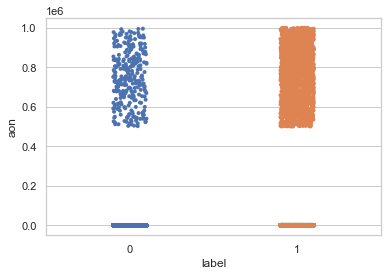

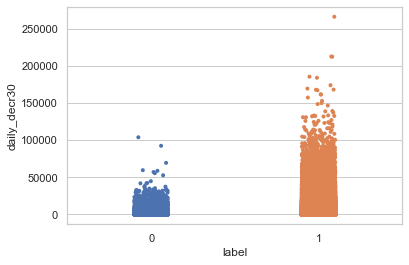

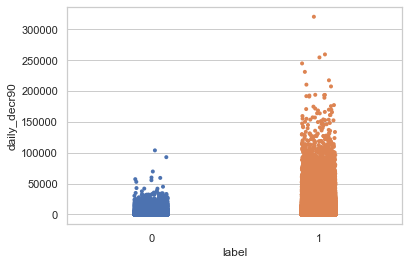

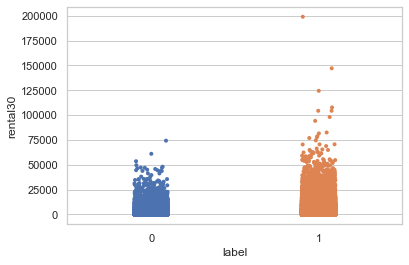

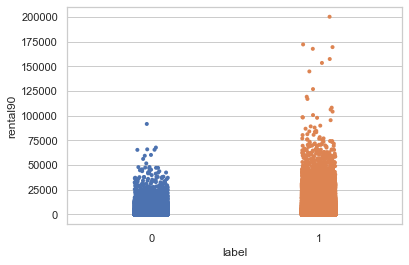

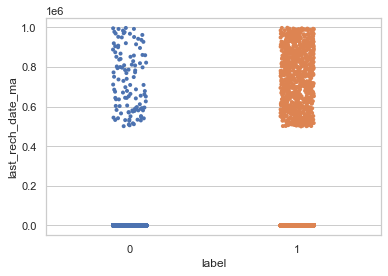

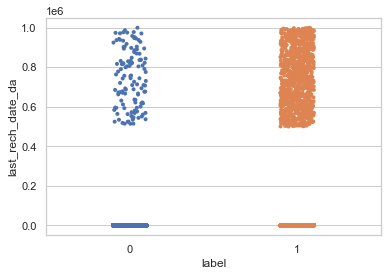

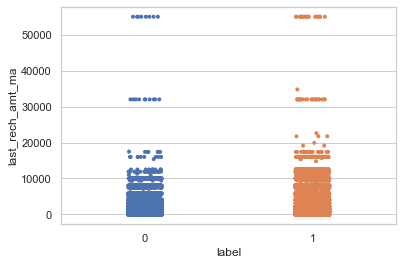

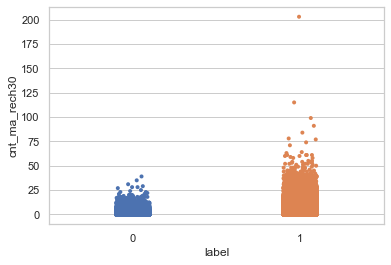

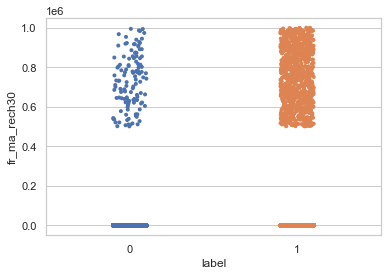

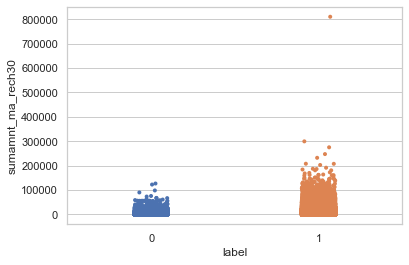

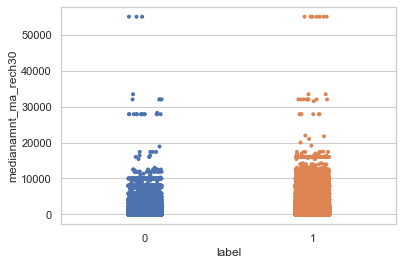

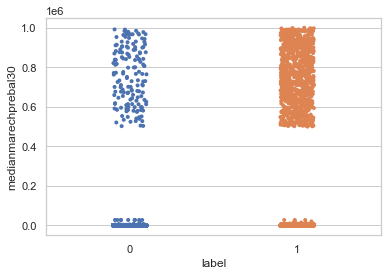

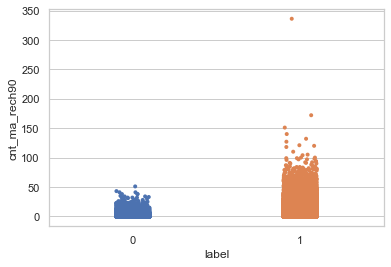

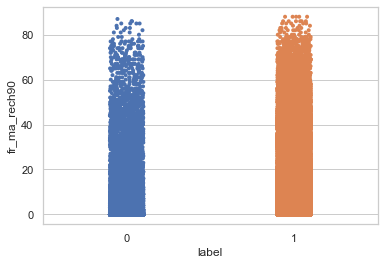

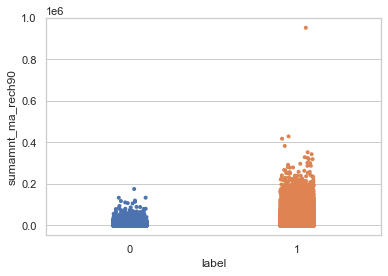

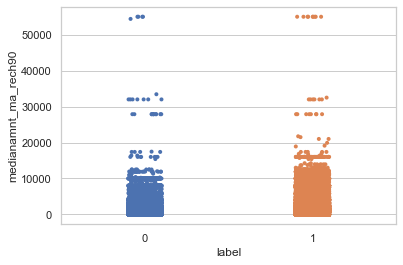

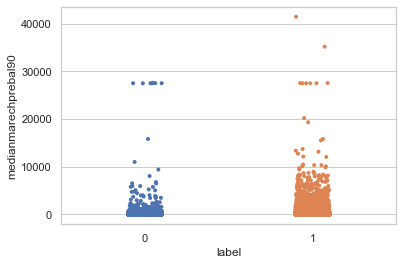

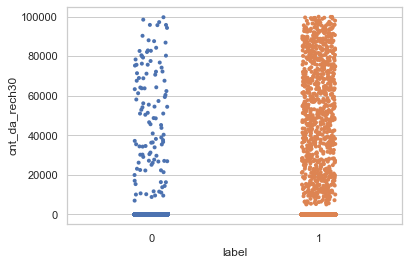

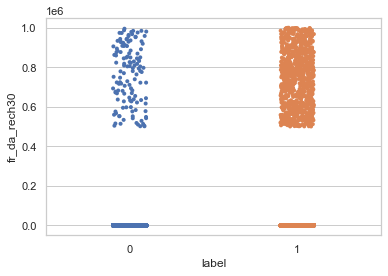

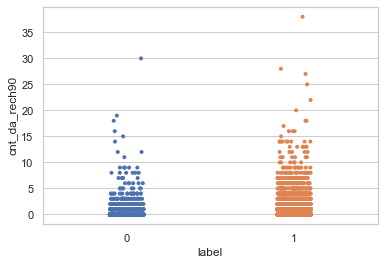

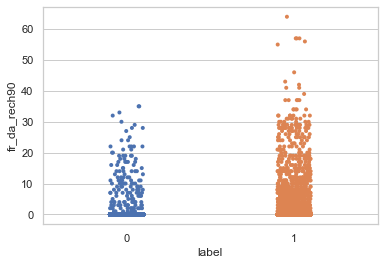

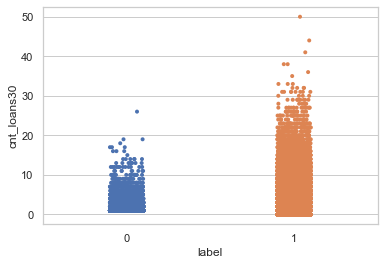

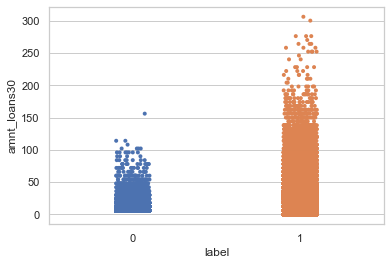

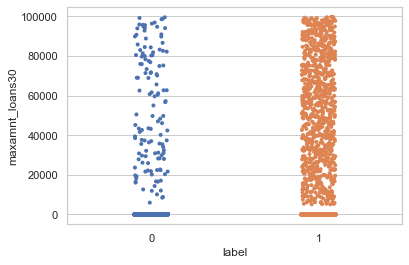

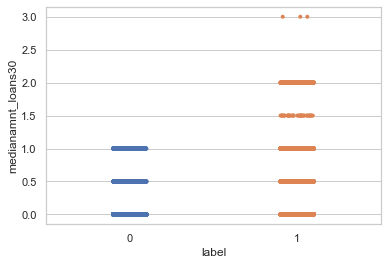

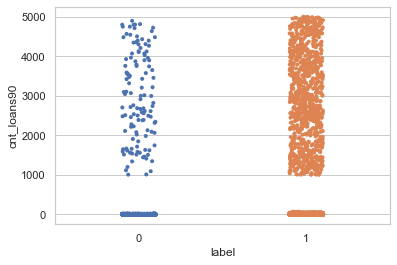

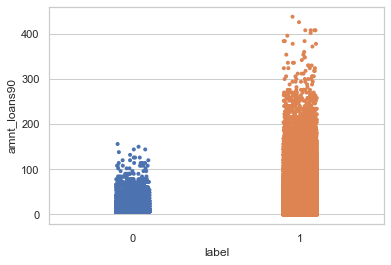

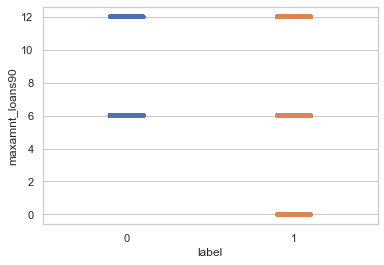

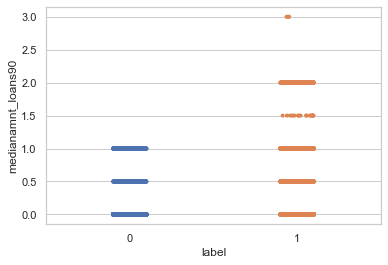

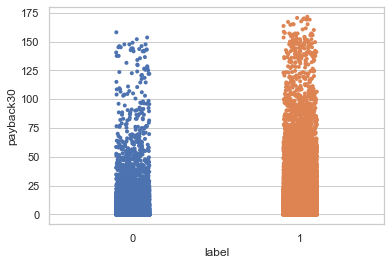

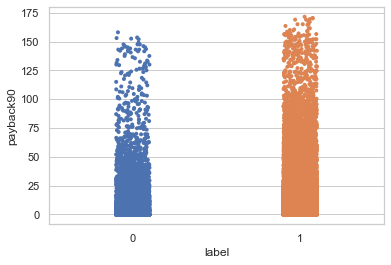

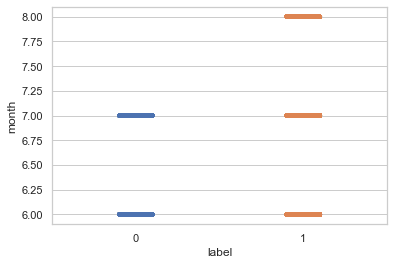

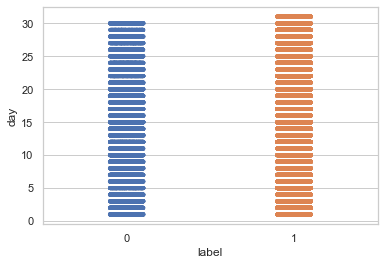

In [18]:
y=0
for i in x:
    if y==0:
        y+=1
        continue
    sns.set(style = 'whitegrid')         
    sns.stripplot(y=i, x='label', data=dataset,size=4)  
    plt.show()

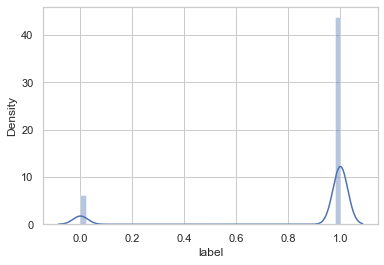

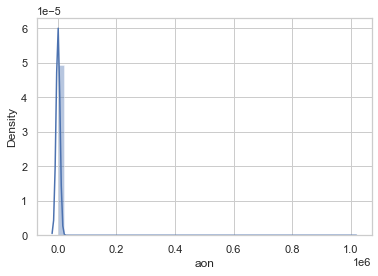

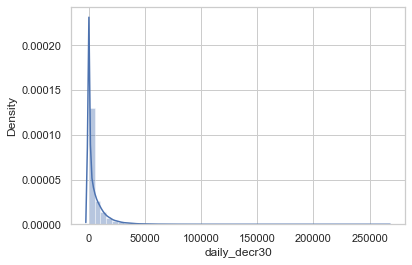

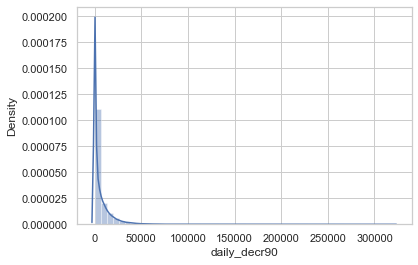

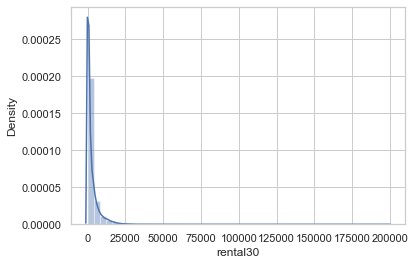

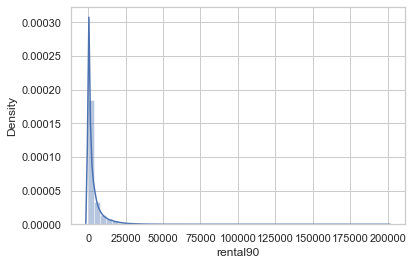

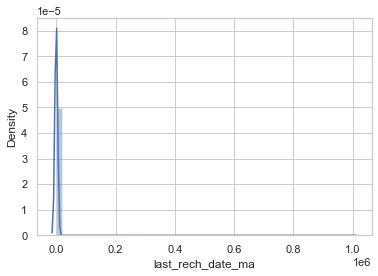

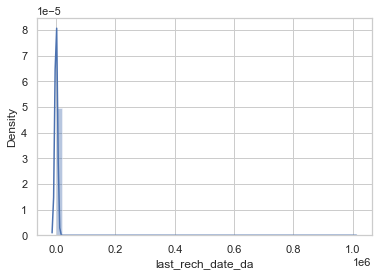

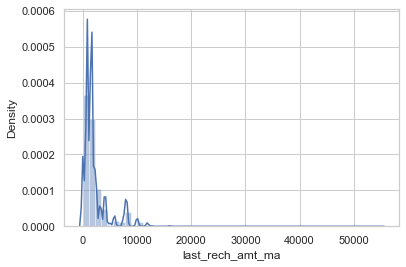

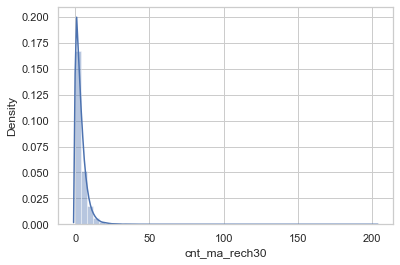

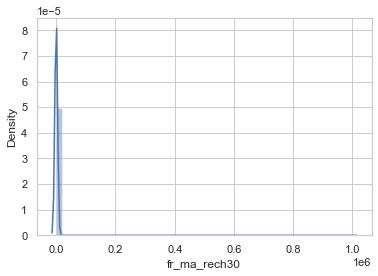

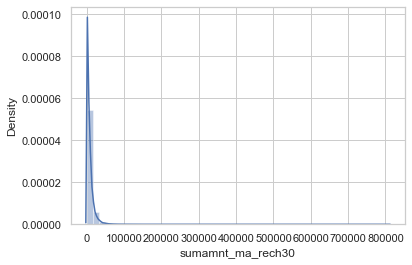

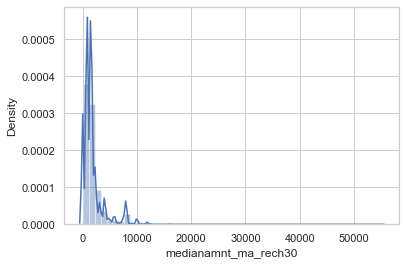

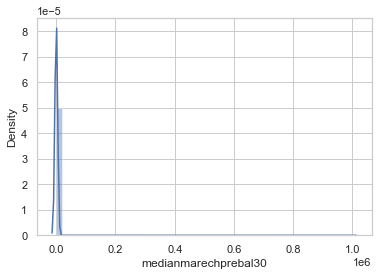

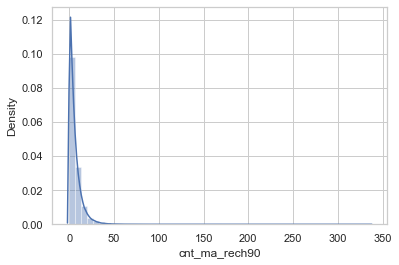

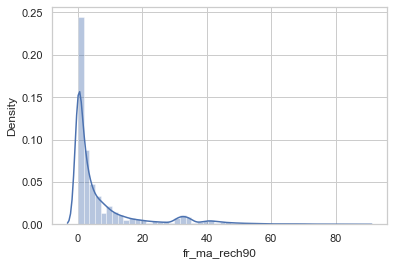

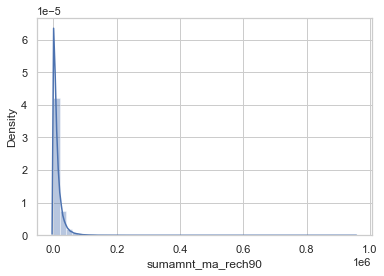

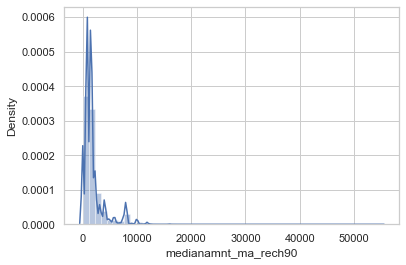

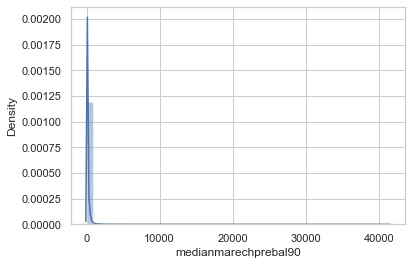

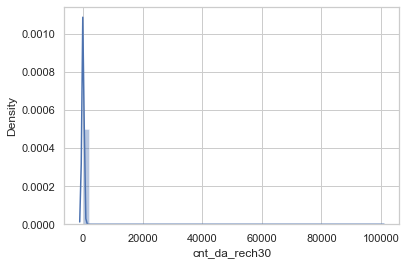

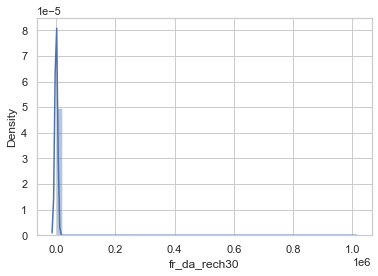

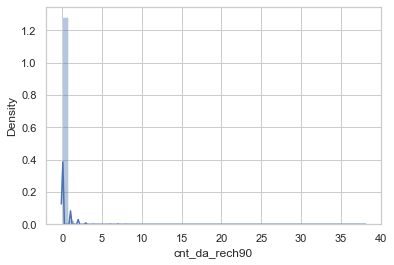

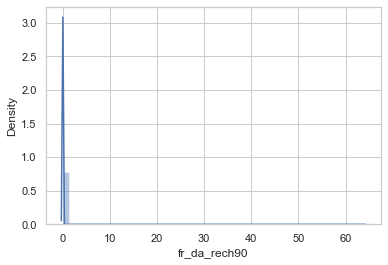

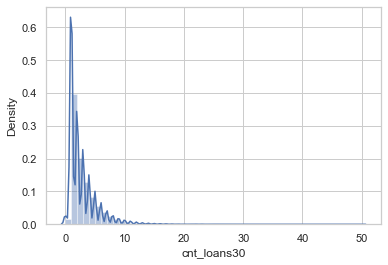

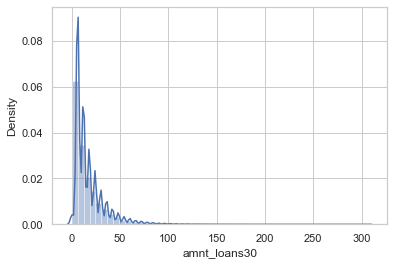

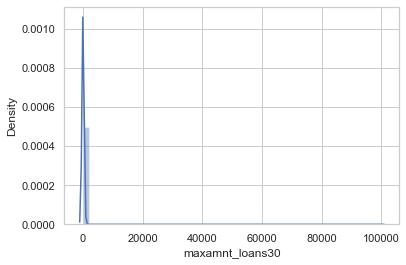

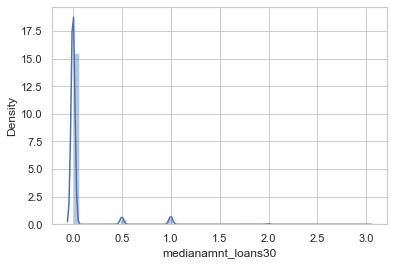

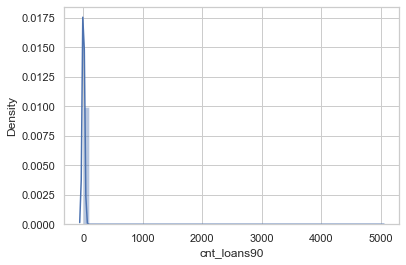

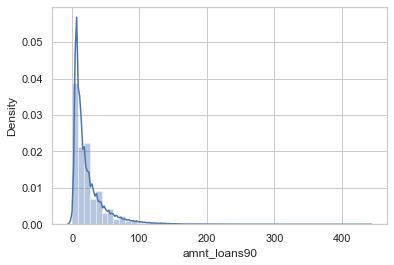

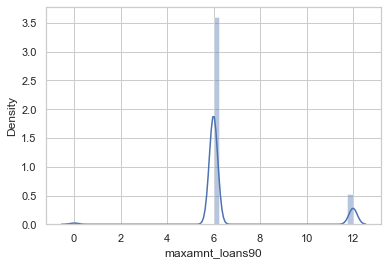

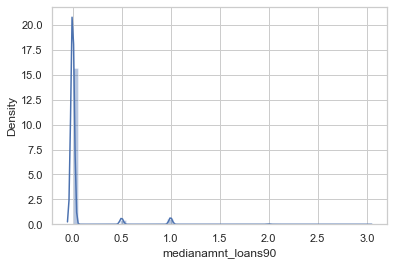

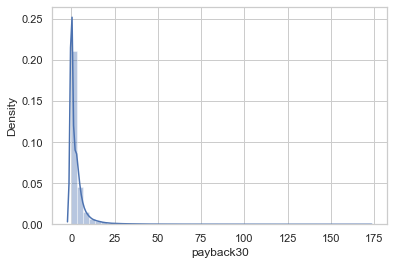

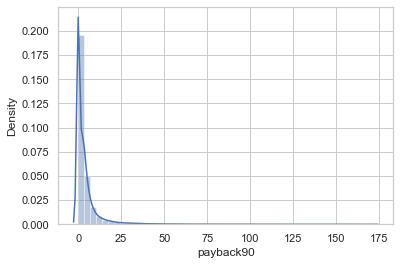

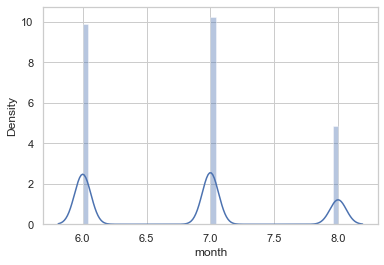

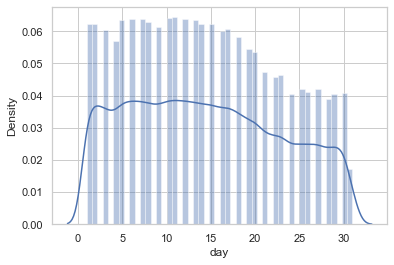

In [19]:
for j in dataset:
    sns.distplot(dataset[j])
    plt.show()

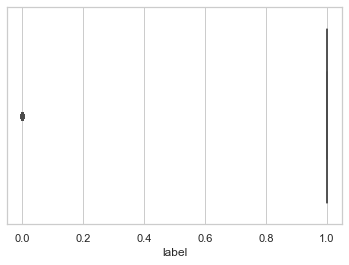

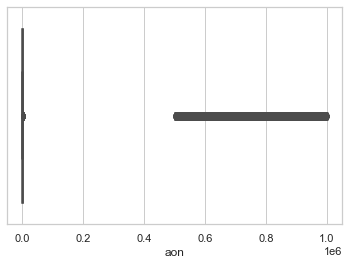

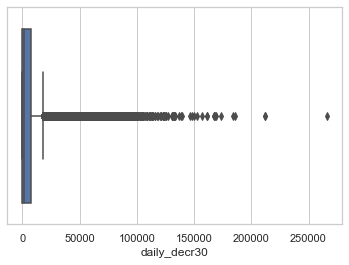

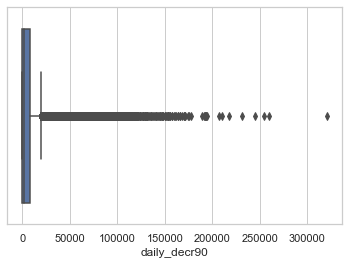

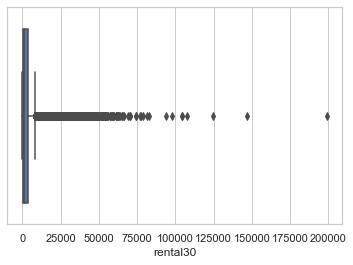

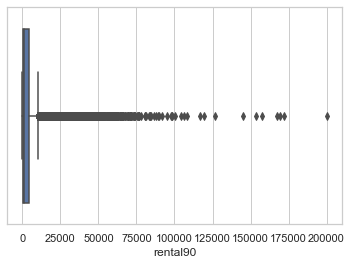

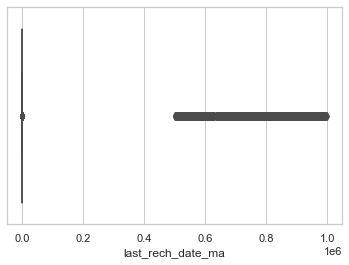

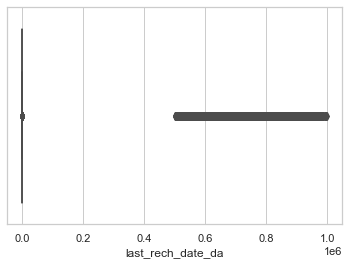

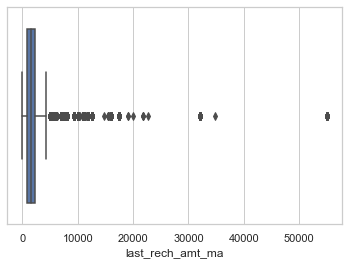

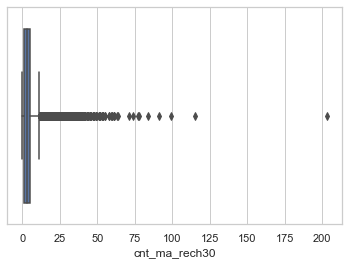

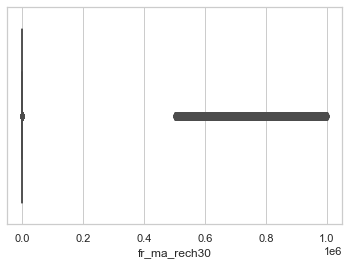

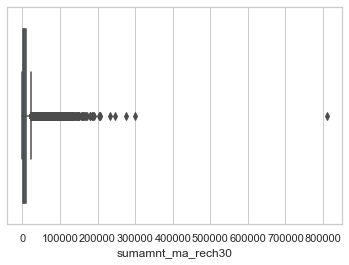

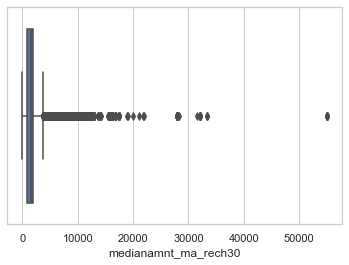

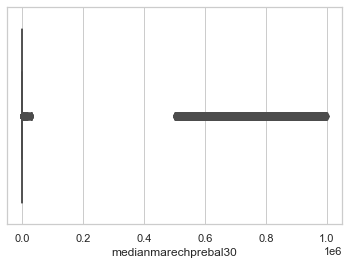

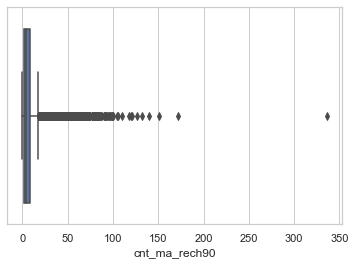

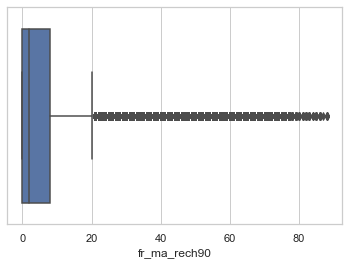

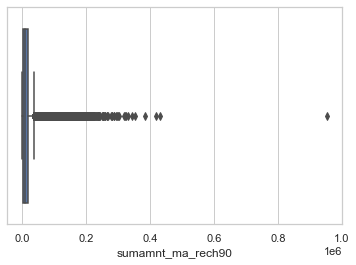

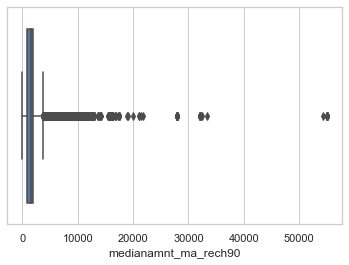

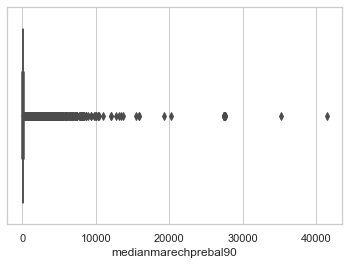

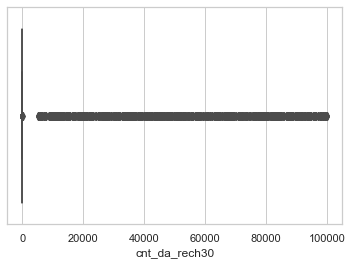

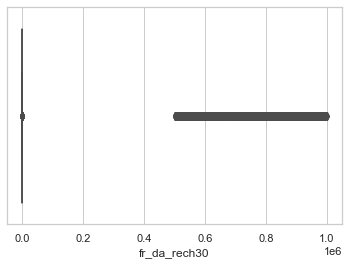

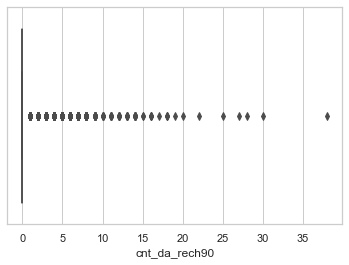

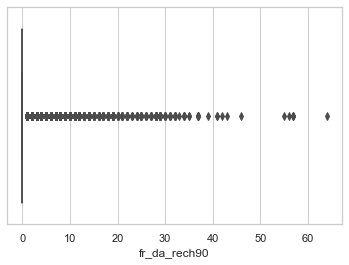

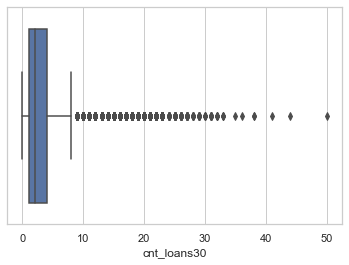

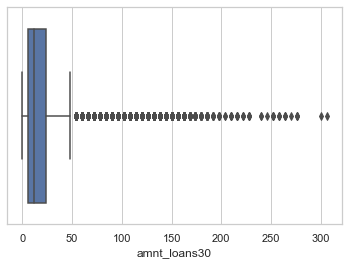

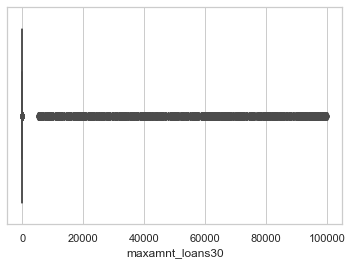

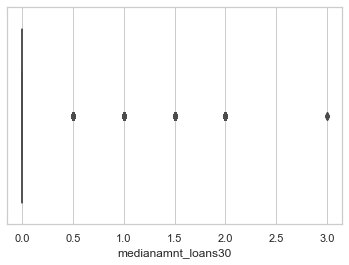

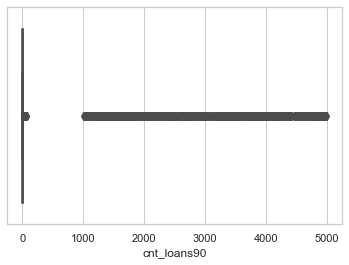

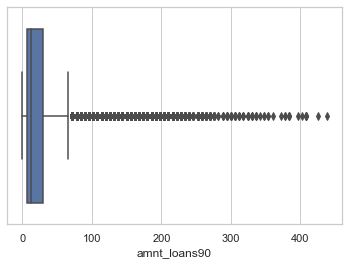

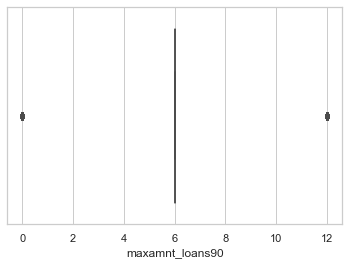

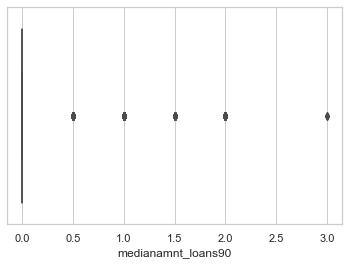

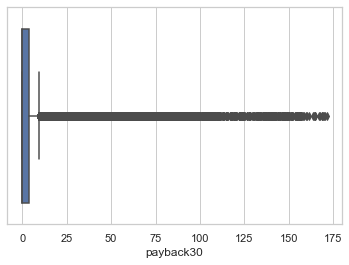

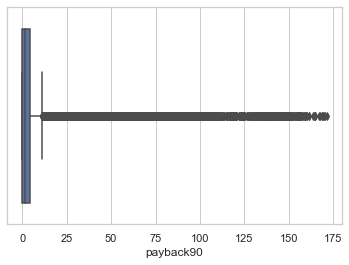

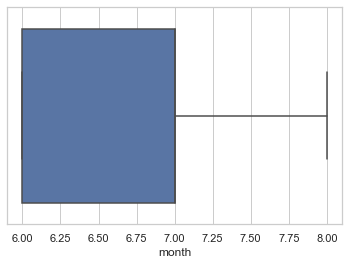

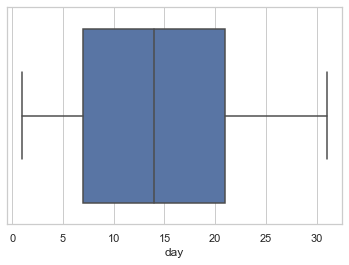

In [20]:
for k in dataset:
    sns.boxplot(dataset[k])
    plt.show()

In [21]:
#arresting the outliers using IQR method
def out(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    whisker_width = 1.5
    news_outliers = df[(df[col] < Q1 - whisker_width*IQR) | (df[col] > Q3 + whisker_width*IQR)]
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [22]:
#assuming that the client is new business and has established this firm in 2012
dataset.loc[dataset['aon'] >=1465, 'aon'] = 1465

In [23]:
#per capita telecom bill expenditure in 2016 is 22182 IR so taking average for 30 days
dataset.loc[dataset['daily_decr30'] >=740, 'daily_decr30'] = 740
dataset.loc[dataset['daily_decr90'] >=740, 'daily_decr90'] = 740

In [24]:
#Indonesia Average Monthly Expenditure per Capita: Post and Telecommunication: Mobile Phone Bill in 2016 is 22,182 which is the threholds limit
dataset.loc[dataset['rental30'] >=7500, 'rental30'] = 7500
dataset.loc[dataset['rental90'] >=10000, 'rental90'] = 10000

In [25]:
# majority of the package expire in 28 days so exggerating it as 30 days
dataset.loc[dataset['last_rech_date_ma'] >=30, 'last_rech_date_ma'] = 30
dataset.loc[dataset['last_rech_date_da'] >=30, 'last_rech_date_da'] = 30

In [26]:
dataset.loc[dataset['cnt_da_rech30'] >0, 'cnt_da_rech30'] = 1
dataset.loc[dataset['fr_da_rech30'] >0, 'fr_da_rech30'] = 1
dataset.loc[dataset['cnt_da_rech90'] >0, 'cnt_da_rech90'] = 1
dataset.loc[dataset['fr_da_rech90'] >0, 'fr_da_rech90'] = 1
dataset.loc[dataset['maxamnt_loans30'].between(1,4), 'maxamnt_loans30'] = 5
dataset.loc[dataset['maxamnt_loans30'] >5, 'maxamnt_loans30'] = 10

In [27]:
#rest other columns outliers can be arrested by using IQR method
col=dataset.columns
columns=col.drop(labels=['label','aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_date_da',
        'maxamnt_loans30','fr_da_rech30','cnt_da_rech30','fr_da_rech90','cnt_da_rech90','medianamnt_loans30','maxamnt_loans90',
                         'medianamnt_loans90','month','day'])
for i in columns:
    out(dataset,i)

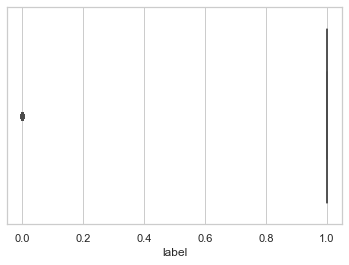

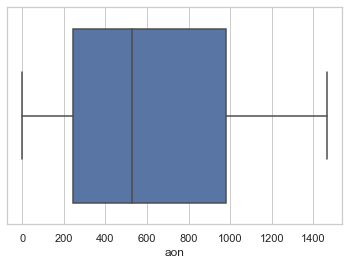

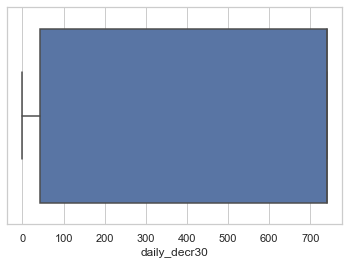

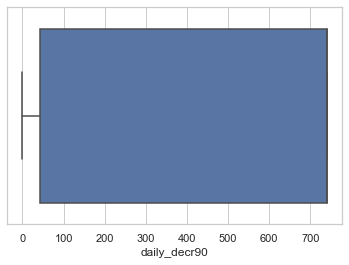

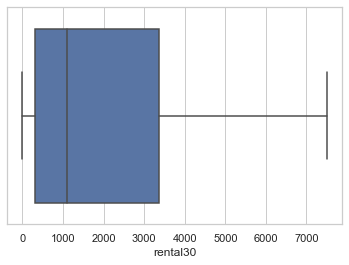

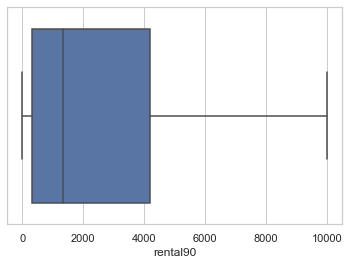

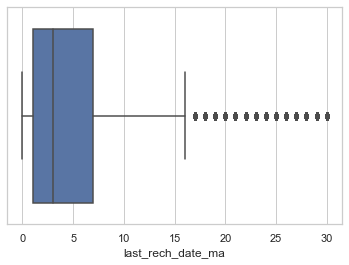

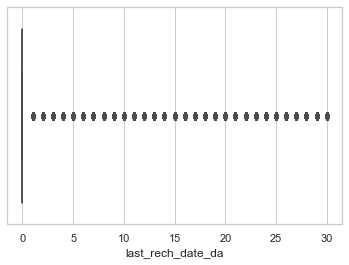

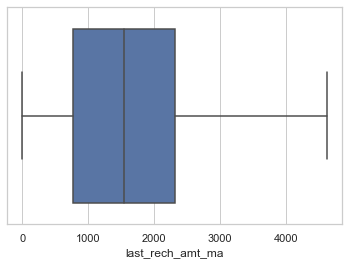

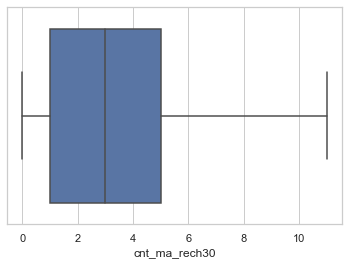

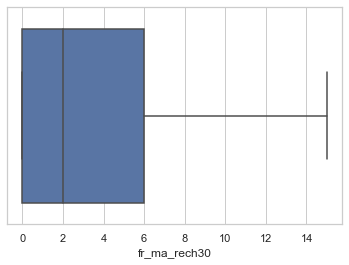

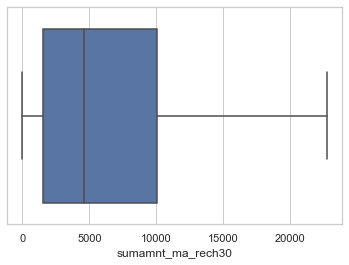

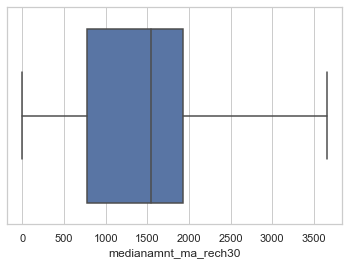

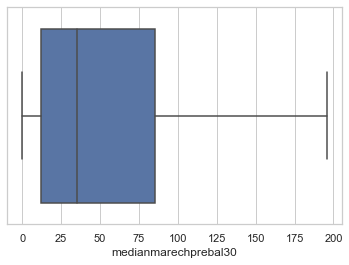

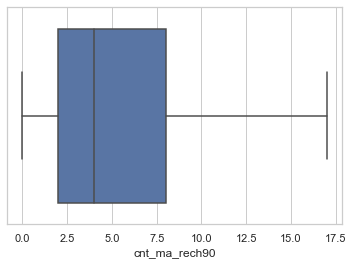

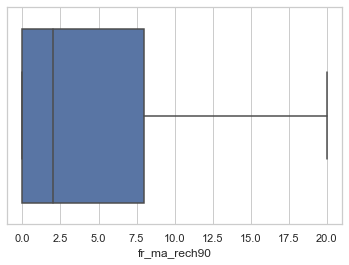

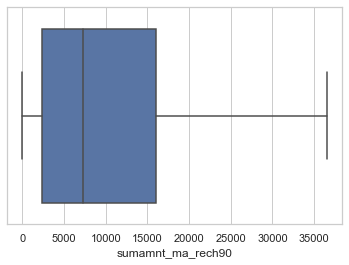

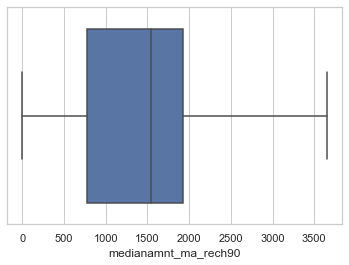

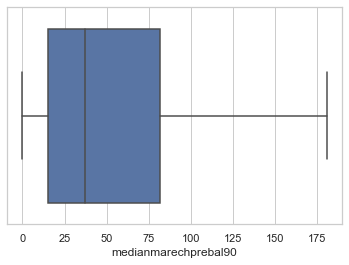

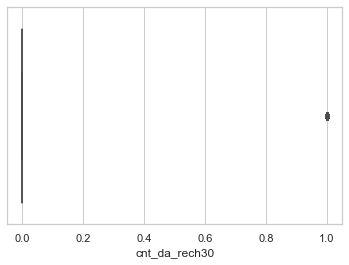

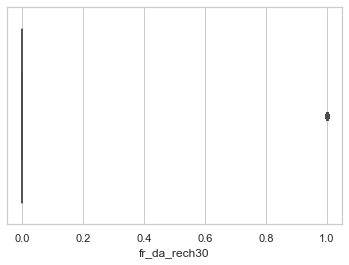

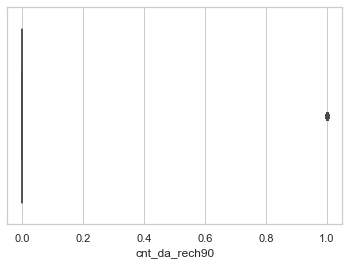

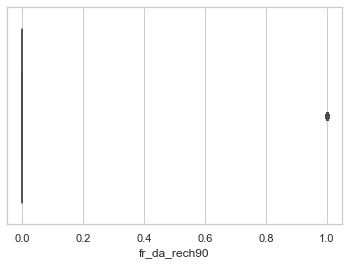

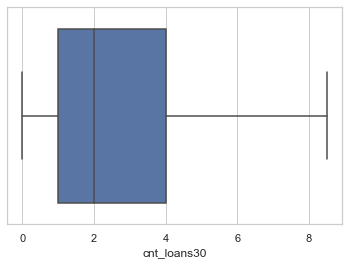

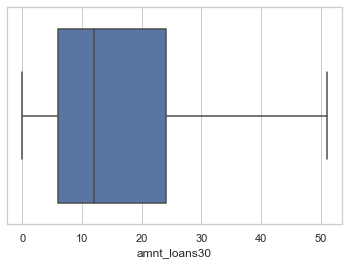

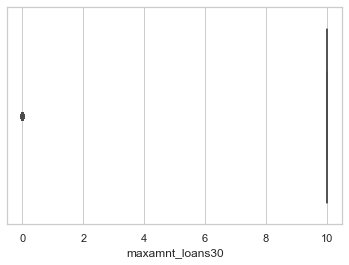

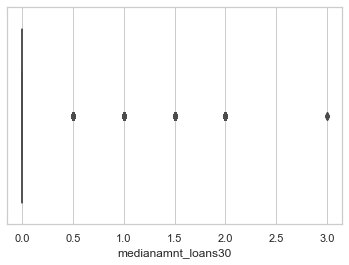

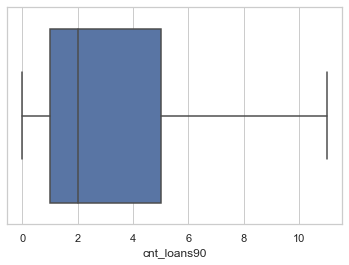

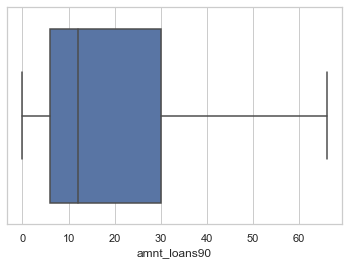

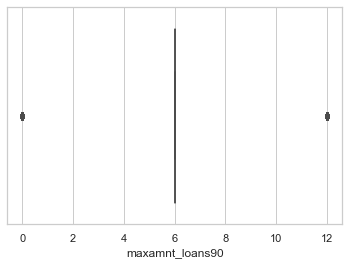

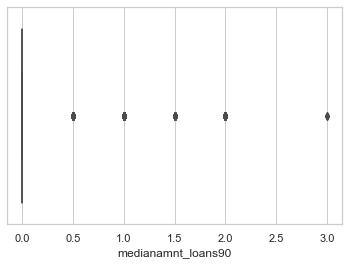

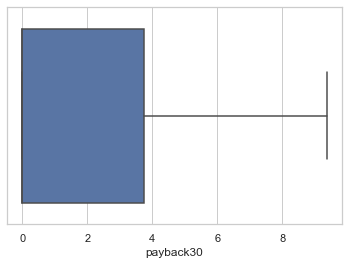

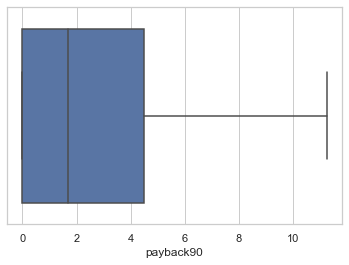

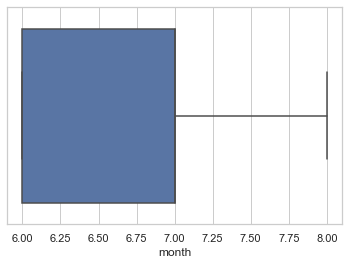

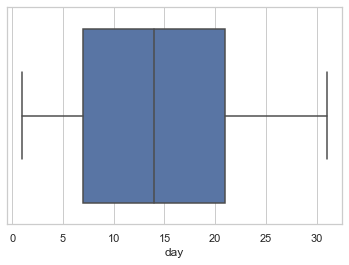

In [28]:
for k in dataset:
    sns.boxplot(dataset[k])
    plt.show()

Observations:
1. age of cellular does not seem to have any effect on the label outcome as they are similarly spread for both the labels
2. subscribers with less daily amount spend are the majority ones who are failing to payback
3. subscribers with less average main balance are more unlikely pay the loan within the due date
4. Users who are recharging frequently are the once who are failing to pay back the loan taken.
5. Users who are recharging less than 100000 Indonesian Rupiah are mostly the user who are not paying back on time.
6. Users who are taking small loans amounts are failing payback the loan amount on time.
7. Users whose median of loan amounts is less than 1.5 are mostly probably the ones who are not paying the loan on time.
8. Users with zero loan amount have 100% success rate.
9. User of august month have 100% success rate.
10. Most of the data right hand skewed.
11. Majority of the columns have outliers in them.

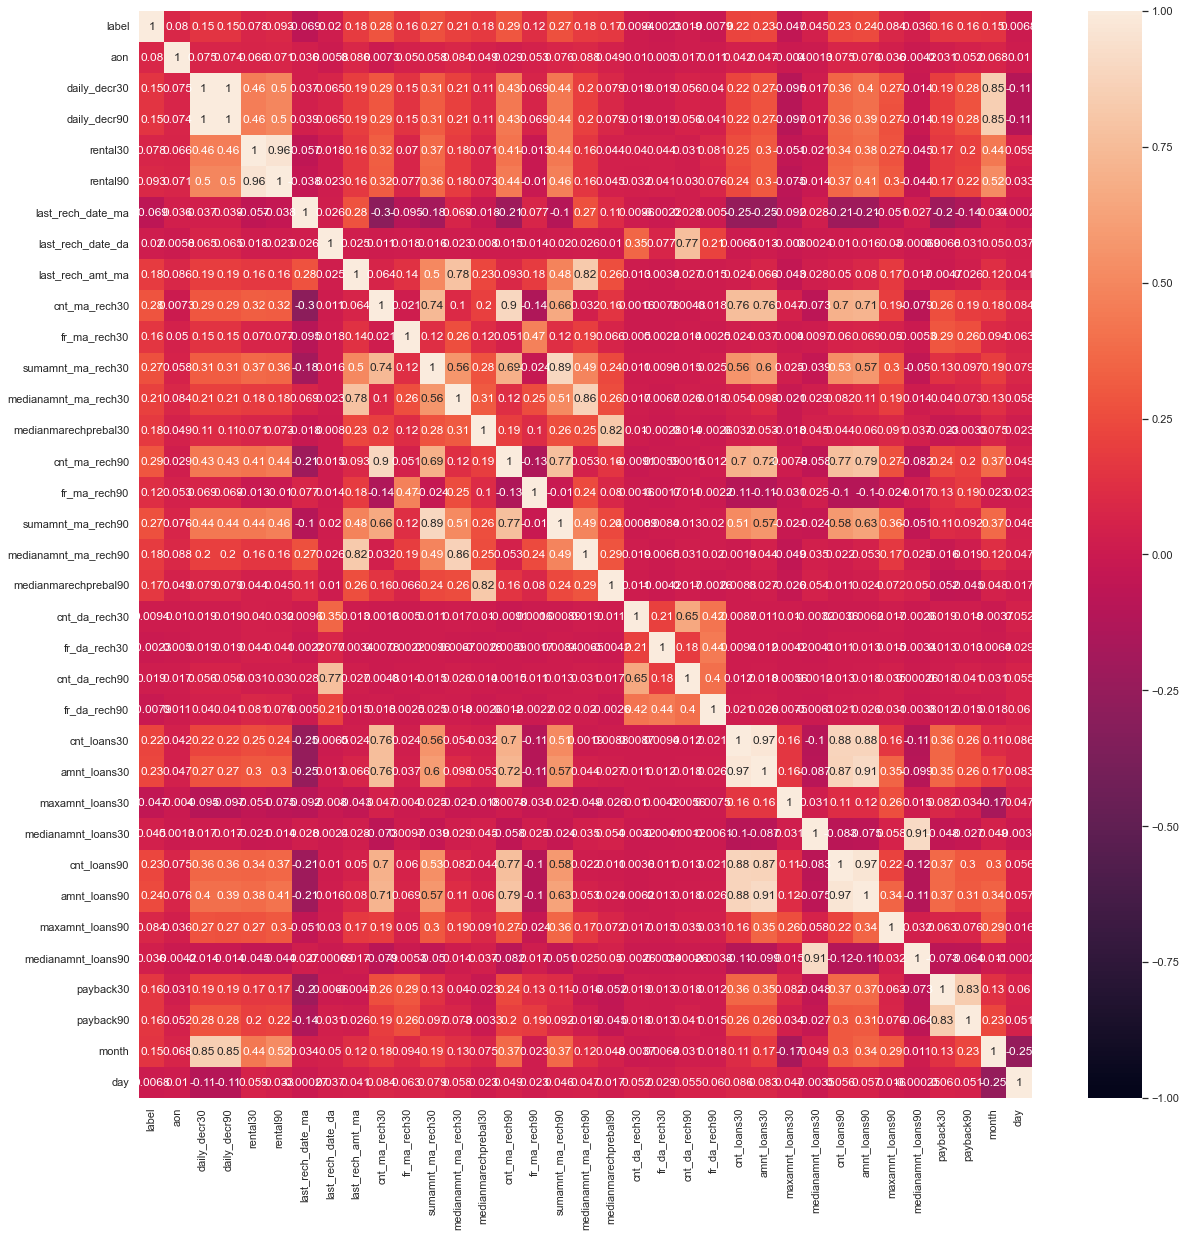

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),vmin=-1,vmax=1, annot=True)
plt.show()

In [30]:
dataset.drop(columns=['daily_decr30','daily_decr90','rental30','cnt_loans30','cnt_loans90','payback90','medianamnt_loans90',
                      'last_rech_date_da','amnt_loans90','sumamnt_ma_rech30','medianamnt_ma_rech90','cnt_da_rech90',
                     'cnt_ma_rech90','last_rech_amt_ma','cnt_ma_rech30','sumamnt_ma_rech90','medianmarechprebal90'],
             inplace=True)

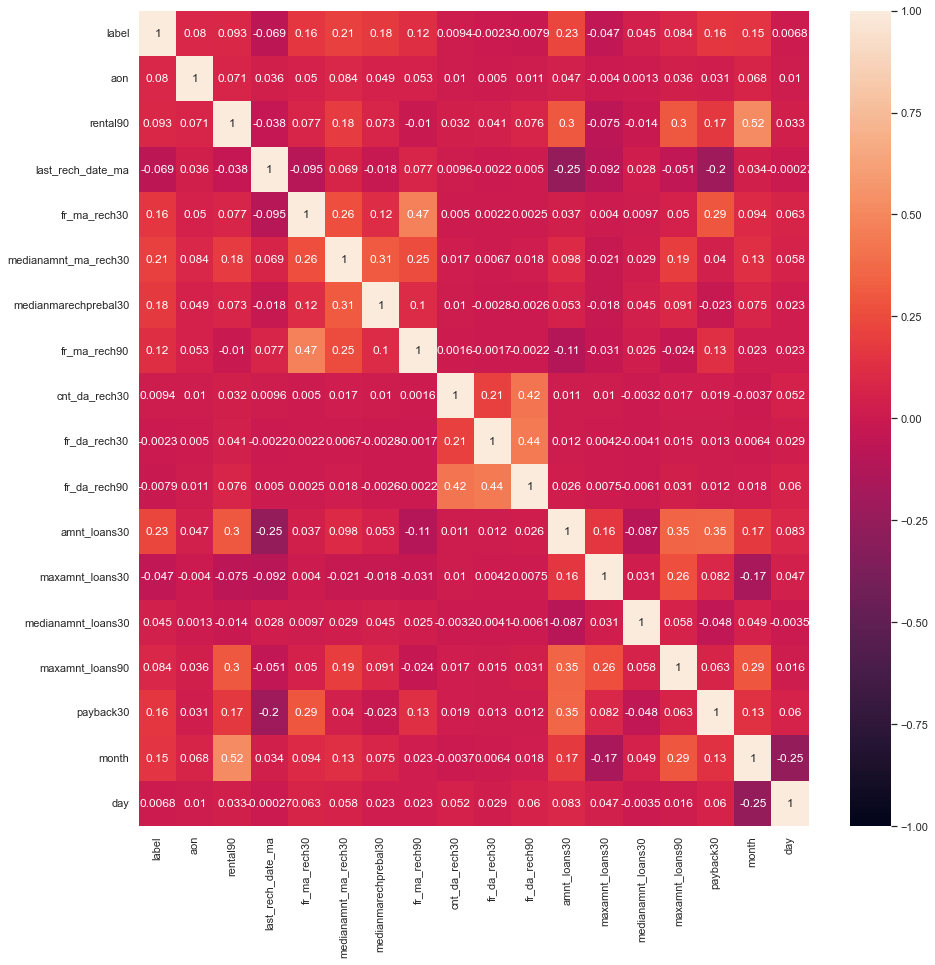

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),vmin=-1,vmax=1, annot=True)
plt.show()

In [32]:
X=dataset.drop(columns=['label'])
Y=dataset['label']
scalar=StandardScaler()
X_scaled= scalar.fit_transform(X)

In [33]:
#checking VIF value 
vif= pd.DataFrame()
vif["feature"] = X.columns

vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X.shape[1])]
  
vif

,feature,VIF
0,aon,1.015982
1,rental90,1.548809
2,last_rech_date_ma,1.130247
3,fr_ma_rech30,1.457163
4,medianamnt_ma_rech30,1.277510
5,medianmarechprebal30,1.120528
6,fr_ma_rech90,1.371041
7,cnt_da_rech30,1.214179
8,fr_da_rech30,1.243105
9,fr_da_rech90,1.446146


# Model Training and Testing

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8,stratify=Y)

In [35]:
y_train.value_counts()

1    146744
0     20930
Name: label, dtype: int64

In [36]:
y_test.value_counts()

1    36687
0     5232
Name: label, dtype: int64

In [37]:
oversample= SMOTE()
X_over,Y_over=oversample.fit_resample(X_train,y_train)

In [38]:
Counter(Y_over)

Counter({1: 146744, 0: 146744})

In [42]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [39]:
logr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = rs(estimator=logr, param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(X_over,Y_over)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   error_score=0, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy')

In [41]:
grid_search.best_estimator_

LogisticRegression(solver='newton-cg')

In [39]:
model1 = LogisticRegression(solver='newton-cg')
model1.fit(X_over,Y_over)
p1=model1.predict(X_test)
print(classification_report(p1, y_test))

              precision    recall  f1-score   support

           0       0.77      0.28      0.42     14191
           1       0.72      0.96      0.82     27728

    accuracy                           0.73     41919
   macro avg       0.75      0.62      0.62     41919
weighted avg       0.74      0.73      0.69     41919



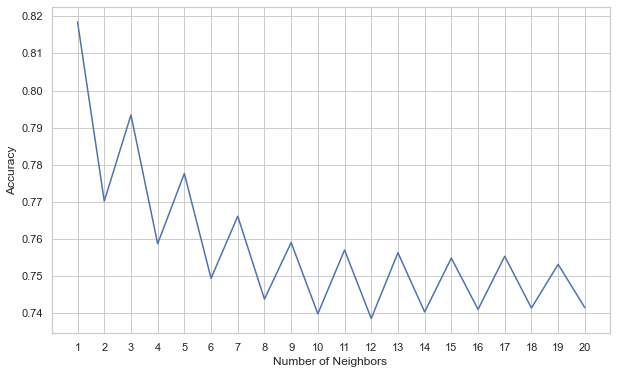

In [43]:
knc = KNeighborsClassifier()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knc = KNeighborsClassifier(n_neighbors = i).fit(X_over,Y_over)
    yhat2= knc.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat2)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [44]:
knn=KNeighborsClassifier()
para={
        'n_neighbors':[1],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[2],
        'metric':['minkowski']
    
}
knn_rs= rs(estimator =knn, param_distributions=para,cv=cv,scoring='accuracy', n_jobs=-1)
knn_rs.fit(X_over,Y_over)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute',
                                                      'auto'],
                                        'leaf_size': [30, 40, 50],
                                        'metric': ['minkowski'],
                                        'n_neighbors': [1], 'p': [2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [45]:
knn_rs.best_estimator_

KNeighborsClassifier(leaf_size=40, n_neighbors=1, weights='distance')

In [40]:
model2 = KNeighborsClassifier(leaf_size=40, n_neighbors=1, weights='distance')
model2.fit(X_over,Y_over)
p2=model2.predict(X_test)
print(classification_report(p2, y_test))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41      7505
           1       0.87      0.92      0.89     34414

    accuracy                           0.82     41919
   macro avg       0.69      0.64      0.65     41919
weighted avg       0.80      0.82      0.81     41919



In [43]:
xgb= XGBClassifier()
param={
    'n_estimators':[350],
    'learning_rate':[0.2],
    'subsample':[0.4,0.6],
    'max_depth':[9,16],
    'colsample_bytree':[0.3,0.4],
    'min_child_weight':[4,5],
}
xgb_C=rs(xgb,param_distributions=param,cv=cv,scoring='accuracy',refit=True,n_jobs=-1)
xgb_C.fit(X_over,Y_over)

[09:33:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_dep...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scal

In [44]:
xgb_C.best_score_

0.9339189339272669

In [45]:
xgb_C.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=16,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [46]:
rfc=RandomForestClassifier()
paras={
      'max_depth':[9,16],
    'min_samples_split':[3,4],
    'max_leaf_nodes':[40,50],
    'min_samples_leaf':[300,400],
    'n_estimators':[300,350],
    'max_samples': [0.2,0.3],
    'max_features':[10,16]
}
rfc_gs= rs(estimator =rfc, param_distributions=paras,cv=cv,scoring='accuracy', n_jobs=-1)
rfc_gs.fit(X_over,Y_over)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [9, 16],
                                        'max_features': [10, 16],
                                        'max_leaf_nodes': [40, 50],
                                        'max_samples': [0.2, 0.3],
                                        'min_samples_leaf': [300, 400],
                                        'min_samples_split': [3, 4],
                                        'n_estimators': [300, 350]},
                   scoring='accuracy')

In [47]:
rfc_gs.best_score_

0.8468784615618741

In [48]:
rfc_gs.best_estimator_

RandomForestClassifier(max_depth=16, max_features=10, max_leaf_nodes=50,
                       max_samples=0.3, min_samples_leaf=300,
                       min_samples_split=4, n_estimators=300)

In [49]:
model3 =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=16,
              min_child_weight=4, monotone_constraints='()',
              n_estimators=350, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)
model3.fit(X_over,Y_over)
p3=model3.predict(X_test)
print(classification_report(p3, y_test))

[12:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.51      0.56      0.53      4833
           1       0.94      0.93      0.94     37086

    accuracy                           0.89     41919
   macro avg       0.73      0.74      0.73     41919
weighted avg       0.89      0.89      0.89     41919



In [50]:
model4 =RandomForestClassifier(max_depth=16, max_features=10, max_leaf_nodes=50,
                       max_samples=0.3, min_samples_leaf=300,
                       min_samples_split=4, n_estimators=300) 
model4.fit(X_over,Y_over)
p4=model4.predict(X_test)
print(classification_report(p4, y_test))

              precision    recall  f1-score   support

           0       0.71      0.39      0.51      9523
           1       0.84      0.95      0.89     32396

    accuracy                           0.83     41919
   macro avg       0.78      0.67      0.70     41919
weighted avg       0.81      0.83      0.81     41919



In [51]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test,p1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, p2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, p3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, p4)


print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, p1))
print('roc_auc_score for KNeighbors Classifier: ', roc_auc_score(y_test, p2))
print('roc_auc_score for XGB Classifier: ', roc_auc_score(y_test, p3))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, p4))

roc_auc_score for Logistic Regression:  0.7479580078987057
roc_auc_score for KNeighbors Classifier:  0.6850066865547204
roc_auc_score for XGB Classifier:  0.727319361744267
roc_auc_score for Random Forest Classifier:  0.778600517944636


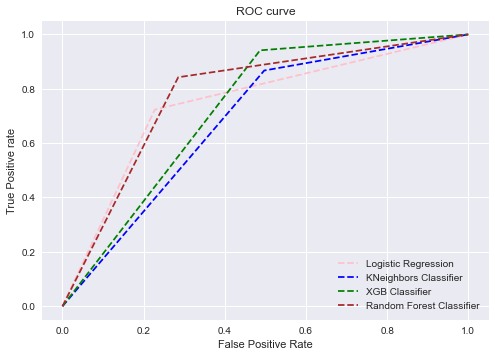

In [52]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(false_positive_rate1, true_positive_rate1, linestyle='--', color='pink', label='Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2, linestyle='--', color='blue', label='KNeighbors Classifier')
plt.plot(false_positive_rate3, true_positive_rate3, linestyle='--',color='green', label='XGB Classifier')
plt.plot(false_positive_rate4, true_positive_rate4, linestyle='--',color='brown', label='Random Forest Classifier')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Random Forest Classifier has performed better than the rest of the models as we can see in the ROC curve chart and the recall and precision values for both the classification better than the other models

In [53]:
#saving the model
random_forest_classifier= pickle.dumps(model4)